### Imports and Data Loader

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
import plotly.express as px

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_df.head(5)

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.2,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.5,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.0,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.0,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.0,950.0,586.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1601 non-null   int64  
 1   Alkalinity, total       1601 non-null   float64
 2   Calcium                 1601 non-null   float64
 3   Chloride                1601 non-null   float64
 4   Fluoride                1601 non-null   float64
 5   Magnesium               1601 non-null   float64
 6   Nitrate as N            1601 non-null   float64
 7   Sodium                  1601 non-null   float64
 8   Specific Conductivity   1601 non-null   float64
 9   Sulfate                 1601 non-null   float64
 10  Total Dissolved Solids  1601 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 137.7 KB


In [ ]:
train_df.shape

(6400, 12)

In [ ]:
train_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


In [ ]:
train_df.columns

Index(['id', 'Alkalinity, total', 'Calcium', 'Chloride', 'Fluoride',
       'Magnesium', 'Nitrate as N', 'Sodium', 'Specific Conductivity',
       'Sulfate', 'Total Dissolved Solids', 'Hardness'],
      dtype='object')

## Preprocess

In [ ]:
def preprocess_data(df):
    # Check for and remove duplicate rows
    duplicate_rows = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_rows}")
    if duplicate_rows > 0:
        df.drop_duplicates(inplace=True)

    # Check for missing values
    missing_values = df.isna().sum().sum()
    print(f"Number of missing values: {missing_values}")

    # Standardize column names
    df.columns = df.columns.str.replace('[, ]', '_', regex=True)

    return df

In [ ]:
# Preprocess train and test data
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

Number of duplicate rows: 0
Number of missing values: 0
Number of duplicate rows: 0
Number of missing values: 0


## Exploratory Data Analysis (EDA)

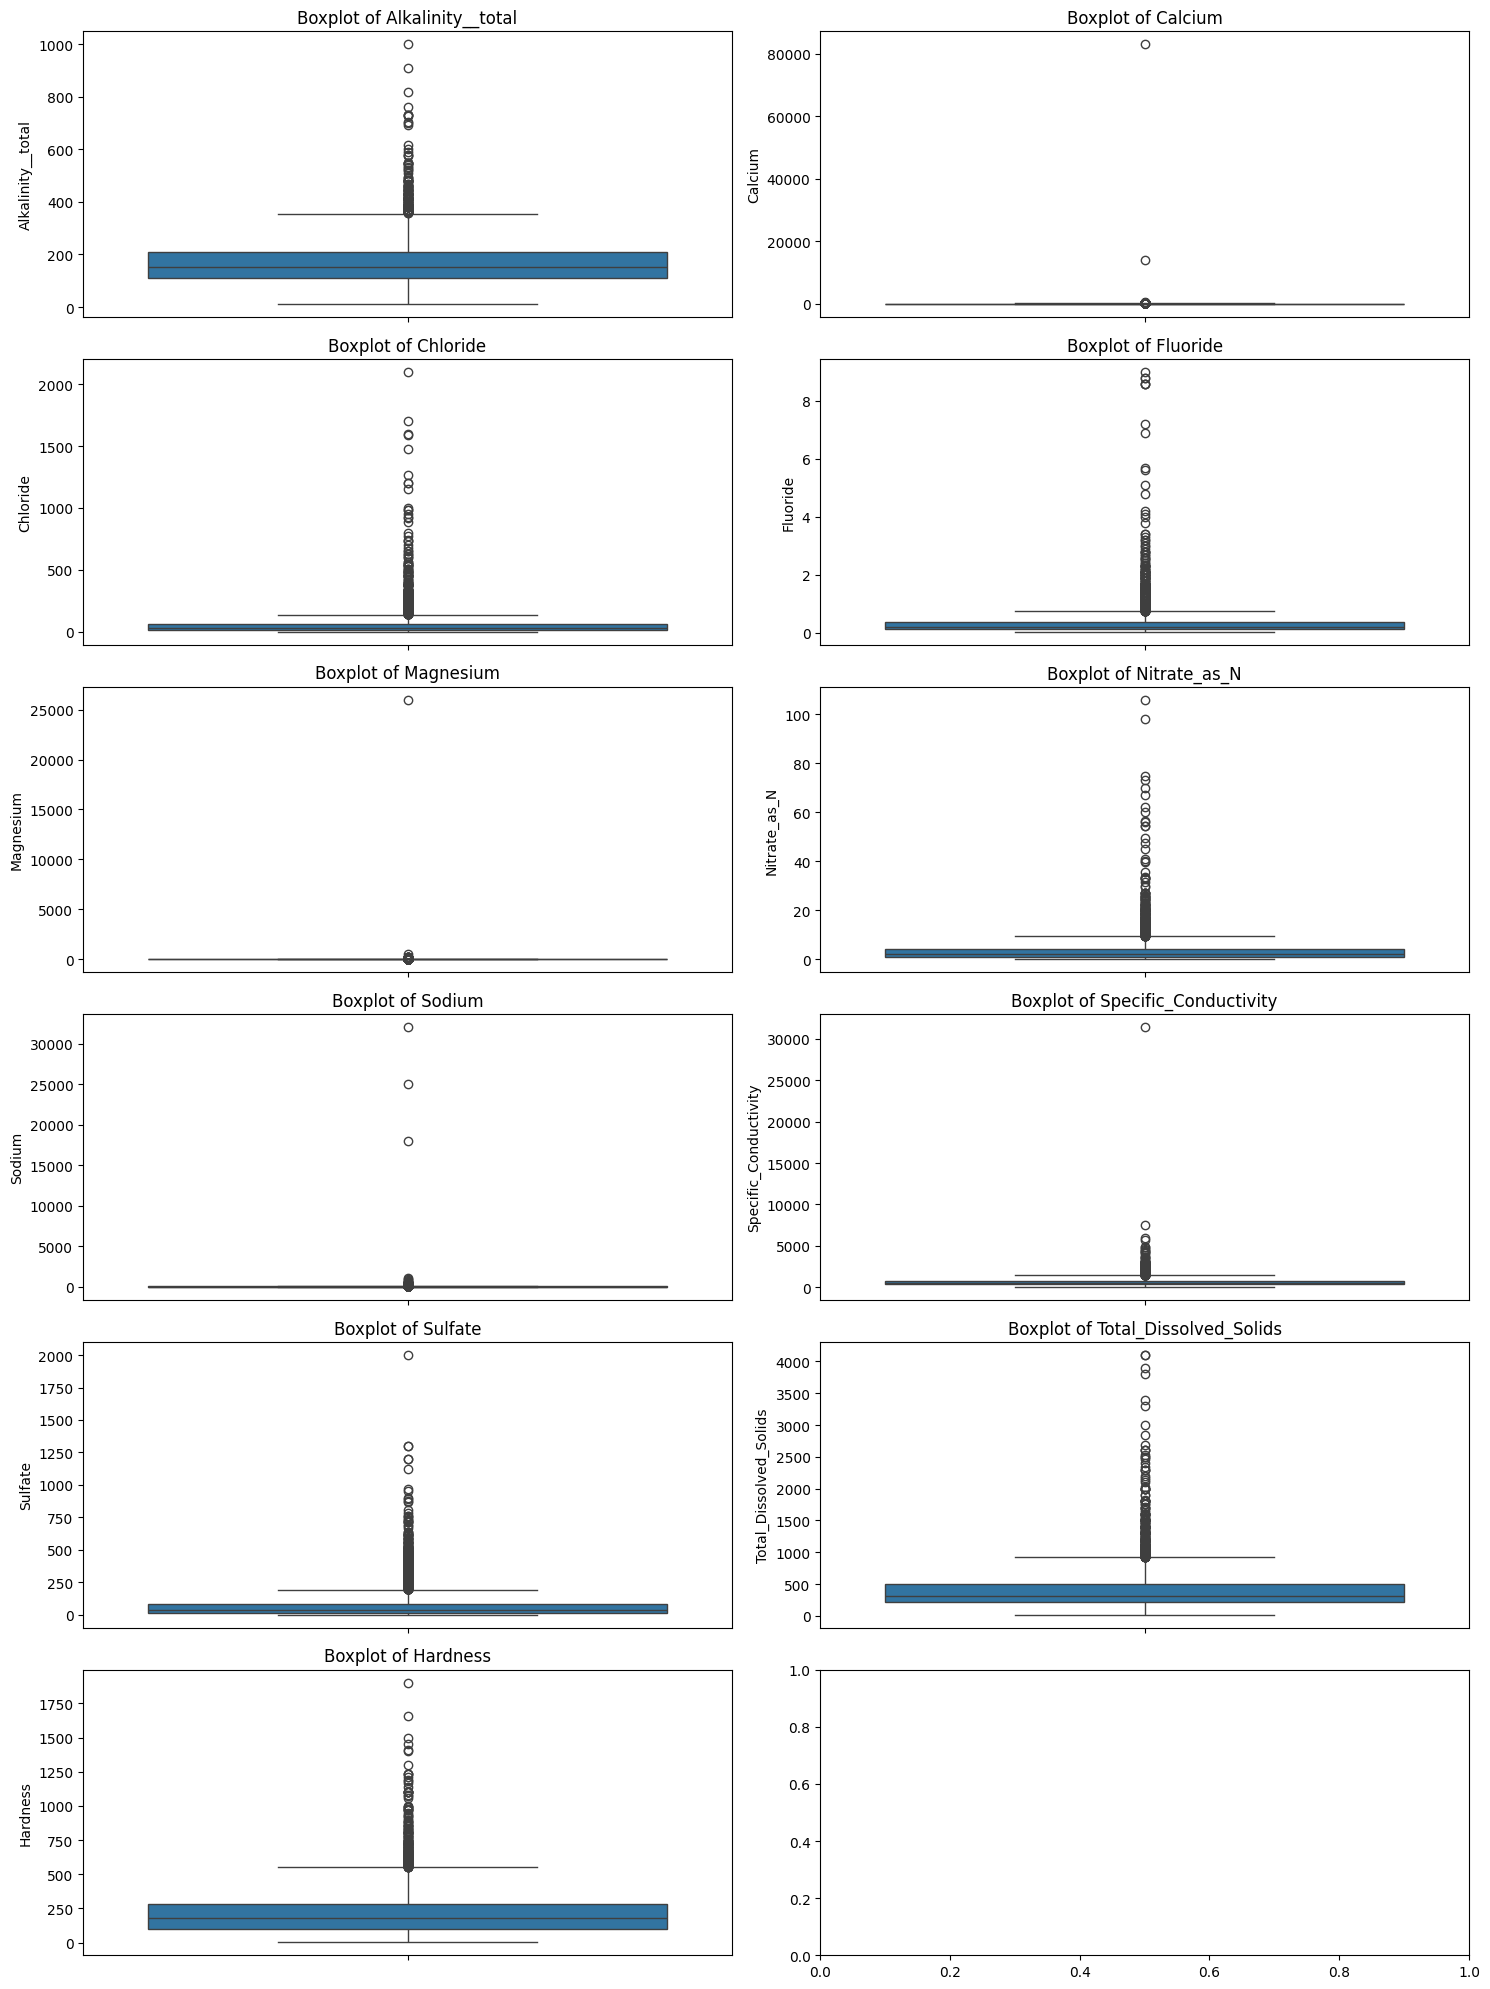

In [ ]:
# Set up the matplotlib figure
fig, axes = plt.subplots(6, 2, figsize=(15, 20))
axes = axes.flatten()

# Plot boxplots for each column except 'id'
for i, col in enumerate(train_df.columns[1:]):
    sns.boxplot(data=train_df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


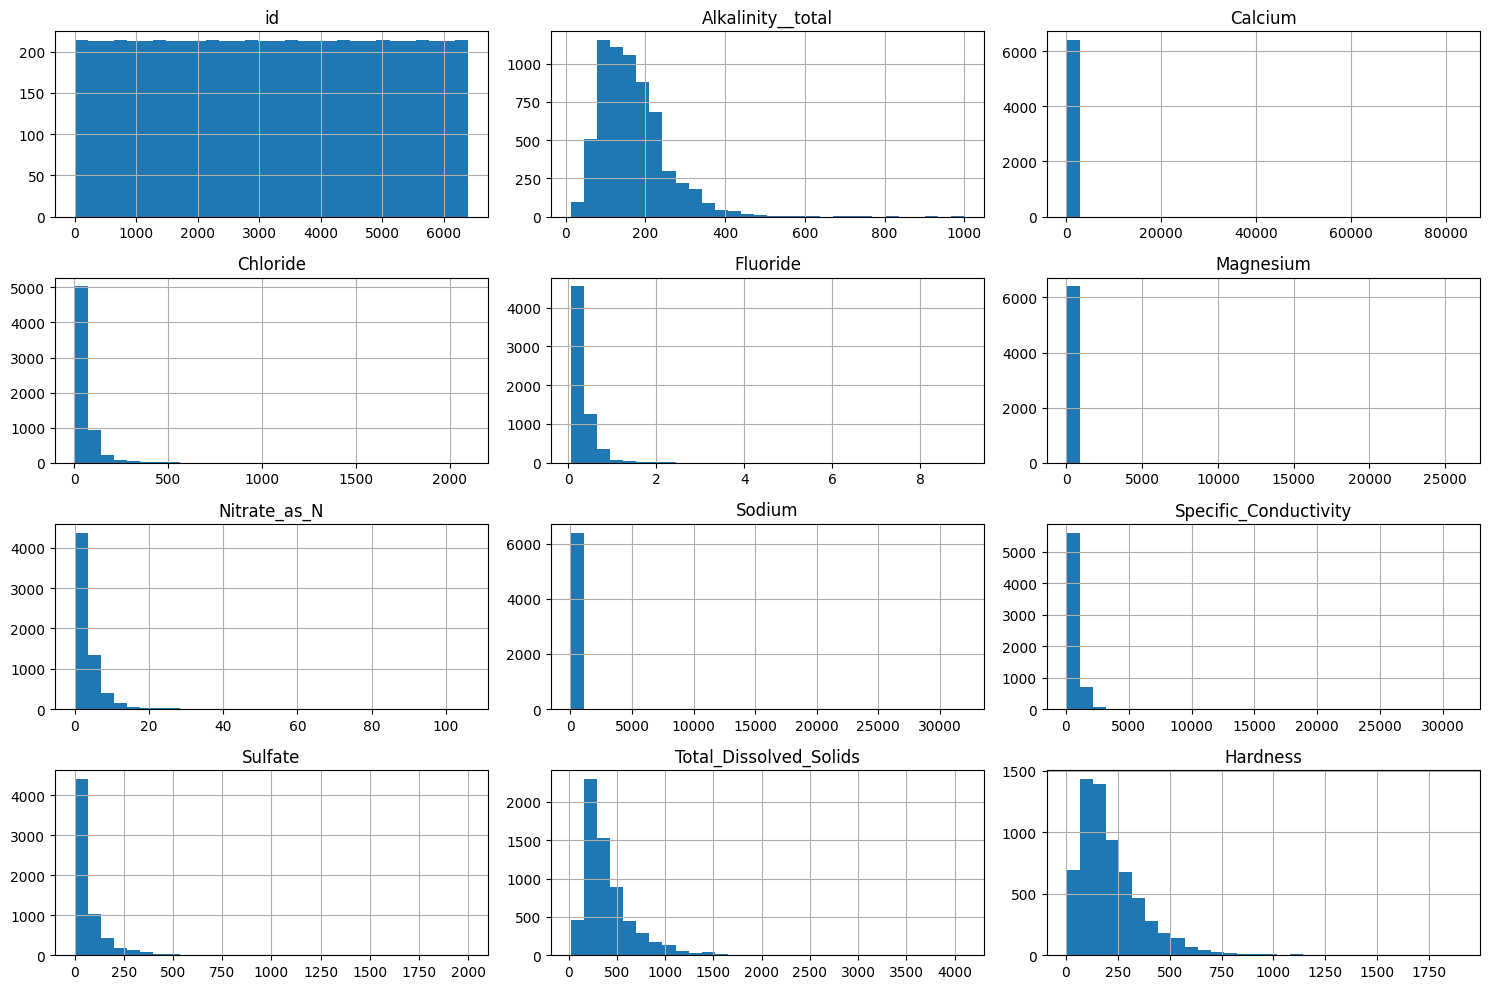

In [ ]:
# Histograms for each feature
train_df.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


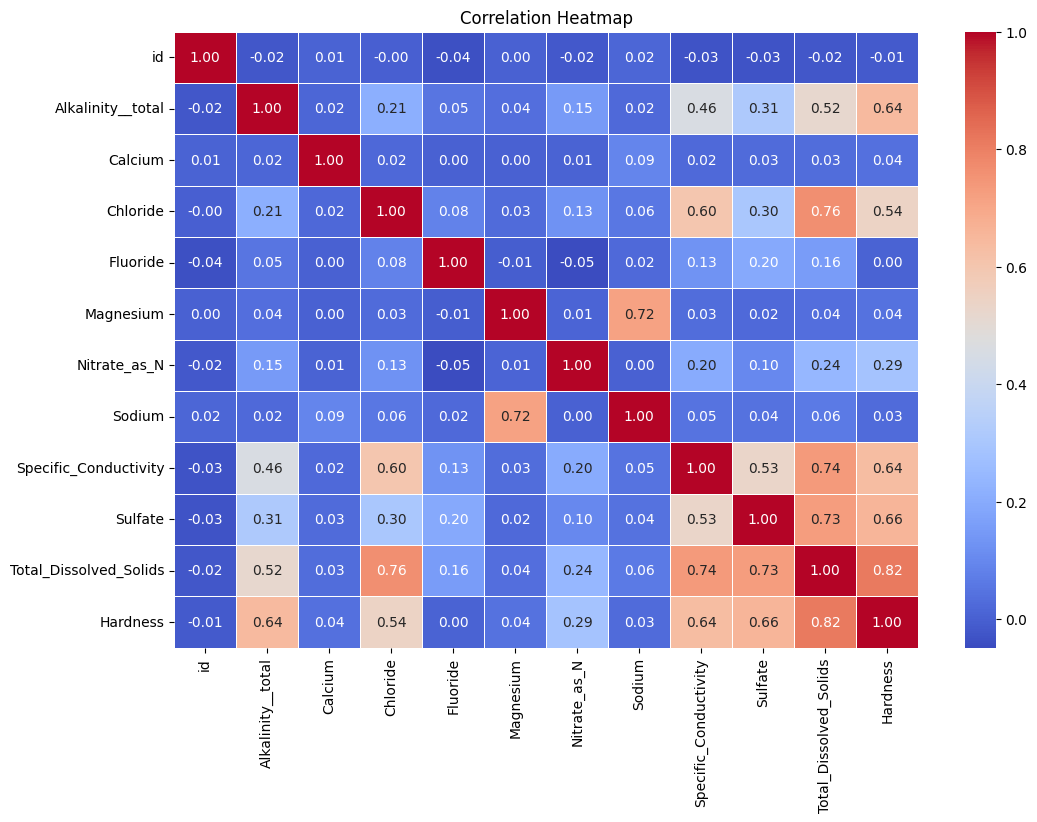

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


## Feature Engineering

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def feature_engineering(df, is_train=True):
    if is_train:
        # Separate the target variable
        target = df['Hardness']
        # Drop the target variable from the features
        features = df.drop(columns=['Hardness'])
    else:
        features = df

    # Feature Interaction: Creating new features as ratios or combinations of existing features
    features['Calcium_to_Magnesium'] = features['Calcium'] / features['Magnesium']
    features['Total_Mineral_Content'] = features['Calcium'] + features['Magnesium'] + features['Sodium'] + features['Chloride'] + features['Sulfate'] + features['Nitrate_as_N'] + features['Fluoride']
    features['Calcium_Proportion'] = features['Calcium'] / features['Total_Dissolved_Solids']
    features['Magnesium_Proportion'] = features['Magnesium'] / features['Total_Dissolved_Solids']
    features['Sodium_Proportion'] = features['Sodium'] / features['Total_Dissolved_Solids']

    # Mengisi nilai yang mungkin NaN atau inf dengan nilai 0
    features = features.fillna(0)
    features = features.replace([np.inf, -np.inf], 0)

    if is_train:
        # Recombine the features with the target variable
        df_processed = pd.concat([features, target.reset_index(drop=True)], axis=1)
    else:
        df_processed = features

    return df_processed


In [ ]:
# # Preprocess train and test data
train_df = feature_engineering(train_df, is_train=True)
test_df = feature_engineering(test_df, is_train=False)

### Training Model

In [ ]:
# pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.9 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import median_absolute_error
import warnings
from sklearn.metrics import r2_score
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

warnings.filterwarnings("ignore")

In [ ]:
# Features and target variable
X = train_df.drop(columns=["id", "Hardness"])
y = train_df["Hardness"]

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_val)
lr_score = r2_score(y_val, lr_pred)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=300, max_depth=30, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)
rf_score = r2_score(y_val, rf_pred)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=300, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_val)
gb_score = r2_score(y_val, gb_pred)

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_val)
svr_score = r2_score(y_val, svr_pred)

# XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=300, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_val)
xgb_score = r2_score(y_val, xgb_pred)

# LightGBM Regressor
lgb_model = LGBMRegressor(n_estimators=300, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_val)
lgb_score = r2_score(y_val, lgb_pred)

# CatBoost Regressor
cat_model = CatBoostRegressor(n_estimators=300, random_state=42, silent=True)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_val)
cat_score = r2_score(y_val, cat_pred)

# K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_val)
knn_score = r2_score(y_val, knn_pred)

# Evaluasi model
print("R2 Score for Linear Regression:", lr_score)
print("R2 Score for Random Forest:", rf_score)
print("R2 Score for Gradient Boosting:", gb_score)
print("R2 Score for Support Vector Regressor:", svr_score)
print("R2 Score for XGBoost:", xgb_score)
print("R2 Score for LightGBM:", lgb_score)
print("R2 Score for CatBoost:", cat_score)
print("R2 Score for K-Nearest Neighbors:", knn_score)

# Pilih model terbaik berdasarkan skor R2
model_scores = {
    "Linear Regression": lr_score,
    "Random Forest": rf_score,
    "Gradient Boosting": gb_score,
    "Support Vector Regressor": svr_score,
    "XGBoost": xgb_score,
    "LightGBM": lgb_score,
    "CatBoost": cat_score,
    "K-Nearest Neighbors": knn_score
}

best_model_name = max(model_scores, key=model_scores.get)

print(f"Model terbaik adalah: {best_model_name}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3719
[LightGBM] [Info] Number of data points in the train set: 5120, number of used features: 15
[LightGBM] [Info] Start training from score 215.428478
R2 Score for Linear Regression: -381.35910101341915
R2 Score for Random Forest: 0.9151867690019975
R2 Score for Gradient Boosting: 0.9065629943985362
R2 Score for Support Vector Regressor: 0.6150517027634881
R2 Score for XGBoost: 0.9166708137543279
R2 Score for LightGBM: 0.9140809678482724
R2 Score for CatBoost: 0.9153078156723999
R2 Score for K-Nearest Neighbors: 0.7760247117366483
Model terbaik adalah: XGBoost


In [ ]:
# Evaluasi model terbaik pada data latih
train_pred = lgb_model.predict(X_train)
train_score = r2_score(y_train, train_pred)

# Evaluasi model terbaik pada data validasi
val_pred = lgb_model.predict(X_val)
val_score = r2_score(y_val, val_pred)

print("R2 Score on Training Data:", train_score)
print("R2 Score on Validation Data:", val_score)

R2 Score on Training Data: 0.9861060147594576
R2 Score on Validation Data: 0.9140809678482724


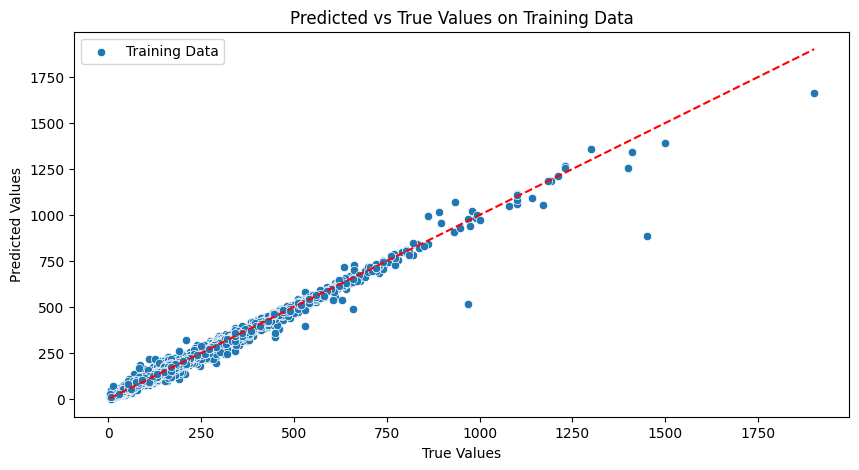

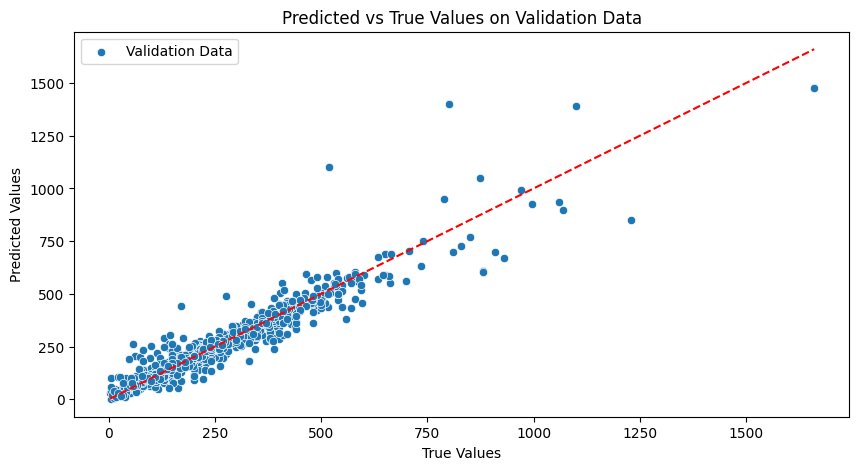

In [ ]:
# Visualisasi hasil prediksi pada data latih
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_train, y=train_pred, label='Training Data')
sns.lineplot(x=[min(y_train), max(y_train)], y=[min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values on Training Data')
plt.legend()
plt.show()

# Visualisasi hasil prediksi pada data validasi
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_val, y=val_pred, label='Validation Data')
sns.lineplot(x=[min(y_val), max(y_val)], y=[min(y_val), max(y_val)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values on Validation Data')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

# Lakukan cross-validation pada data latih
cv_scores = cross_val_score(lgb_model, X, y, cv=5, scoring='r2')

print("Cross-Validation R2 Scores:", cv_scores)
print("Mean Cross-Validation R2 Score:", cv_scores.mean())
print("Standard Deviation of Cross-Validation R2 Score:", cv_scores.std())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3716
[LightGBM] [Info] Number of data points in the train set: 5120, number of used features: 15
[LightGBM] [Info] Start training from score 215.160725
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3710
[LightGBM] [Info] Number of data points in the train set: 5120, number of used features: 15
[LightGBM] [Info] Start training from score 215.766163
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3725
[LightGBM] [Info] Number of data points in the train set: 5120, number of used features: 15
[LightGBM] [Info] Start tr

In [ ]:
# Define features for test
X_test = test_df.drop(columns=['id'])

# Make predictions on the test set
y_test_pred = lgb_model.predict(X_test)

# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({'id': test_df['id'], 'Hardness': y_test_pred})

# Save to CSV
predictions_df.to_csv('lgb_predictions.csv', index=False)

# Display the first few rows of the predictions
predictions_df.head()

,id,Hardness
0,6400,91.142577
1,6401,92.737788
2,6402,129.475333
3,6403,98.046499
4,6404,332.236246




# **Research Question**

### **1. Dalam konteks bisnis dan ilmiah, apakah memprediksi nilai kesadahan (Hardness) air tanah merupakan hal yang mendesak? Jelaskan urgensinya!**


  **Jawab**

Memprediksi nilai kesadahan (Hardness) air tanah merupakan hal yang mendesak dalam konteks kesehatan manusia, infrastruktur, dan ekonomi. Pertama, dari segi kesehatan, air keras dapat menyebabkan berbagai masalah kesehatan seperti gangguan pencernaan dan batu ginjal. Selain itu, air keras sering mengandung kontaminan lain yang berbahaya dalam konsentrasi tinggi, seperti besi dan mangan, yang berdampak negatif pada kesehatan manusia (Sulaiman, 2020).

Kedua, dalam hal infrastruktur, air keras dapat menyebabkan penumpukan mineral di dalam pipa dan peralatan rumah tangga seperti mesin cuci dan pemanas air, yang mengurangi efisiensi dan masa pakai peralatan tersebut. Penumpukan mineral ini juga dapat mengurangi aliran air dalam sistem distribusi, meningkatkan biaya pemeliharaan dan perbaikan sistem tersebut (Lestari, 2023).

Ketiga, dari perspektif ekonomi, industri yang menggunakan air keras sebagai bahan baku atau untuk proses produksi bisa mengalami peningkatan biaya operasional karena kerak dan penumpukan mineral pada mesin dan peralatan. Selain itu, pengolahan air keras memerlukan teknologi dan bahan kimia tambahan untuk melunakkan air sebelum digunakan, yang secara signifikan meningkatkan biaya pengolahan air . Dengan demikian, prediksi kesadahan air tanah sangat penting untuk mengelola sumber daya air secara efektif dan efisien (Lestari, 2023).

### **2. Apakah submisi Kaggle Anda mengalami overfit atau underfit? Jika iya, jelaskan mengapa submisi tersebut Anda anggap sebagai overfit atau underfit serta jelaskan bagaimana cara mengatasi hal tersebut! Jika tidak, jelaskan mengapa!**

**Jawab**

Hasil training model tampaknya mengalami overfit. Hal ini dapat dilihat dari beberapa indikator:
- Perbedaan Signifikan antara R² pada Data Latih dan Validasi:
  > R² Score on Training Data: 0.9861313862044746

  > R² Score on Validation Data: 0.9202198206320317

  Perbedaan yang cukup signifikan antara performa model pada data latih dan data validasi menunjukkan bahwa model mungkin telah mempelajari noise pada data latih, sehingga kinerjanya lebih baik pada data latih dibandingkan data yang belum pernah dilihat sebelumnya (data validasi).

- Hasil Cross-Validation:
  > Cross-Validation R2 Scores: [0.93289981 0.90193101 0.85592576 0.92499991 0.9311854 ]

  > Mean Cross-Validation R2 Score: 0.9093883786189713

  > Standard Deviation of Cross-Validation R2 Score: 0.028932616415373046
  
  Meskipun hasil cross-validation menunjukkan hasil yang cukup stabil, ada indikasi bahwa performa pada beberapa fold (0.85592576) lebih rendah dibandingkan yang lain.

  Cara penyelesaian permasalahan overfit pada kasus ini salah satunya adalah dengan mengurangi kompleksitas (Rice, 2020). Pada kode berikut penulis mengurangi max_depth dan n_estimators pada model untuk mengurangi kompleksitas model.



In [ ]:
# LightGBM Regressor
lgb_model = LGBMRegressor(n_estimators=50, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_val)
lgb_score = r2_score(y_val, lgb_pred)
print("R2 Score for LightGBM:", lgb_score)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3719
[LightGBM] [Info] Number of data points in the train set: 5120, number of used features: 15
[LightGBM] [Info] Start training from score 215.428478
R2 Score for LightGBM: 0.9276861780453537


In [ ]:
# Evaluasi model terbaik pada data latih
train_pred = lgb_model.predict(X_train)
train_score = r2_score(y_train, train_pred)

# Evaluasi model terbaik pada data validasi
val_pred = lgb_model.predict(X_val)
val_score = r2_score(y_val, val_pred)

print("R2 Score on Training Data:", train_score)
print("R2 Score on Validation Data:", val_score)

R2 Score on Training Data: 0.9499885028987769
R2 Score on Validation Data: 0.9276861780453537


### **3. Jawablah pertanyaan-pertanyaan statistik berikut:**
#### a. Berapa Hardness rata-rata dari sumber air yang memiliki kadar sodium di atas persentil 75 dan memiliki tingkat kebasaan (Alkalinity) di atas rata-rata?


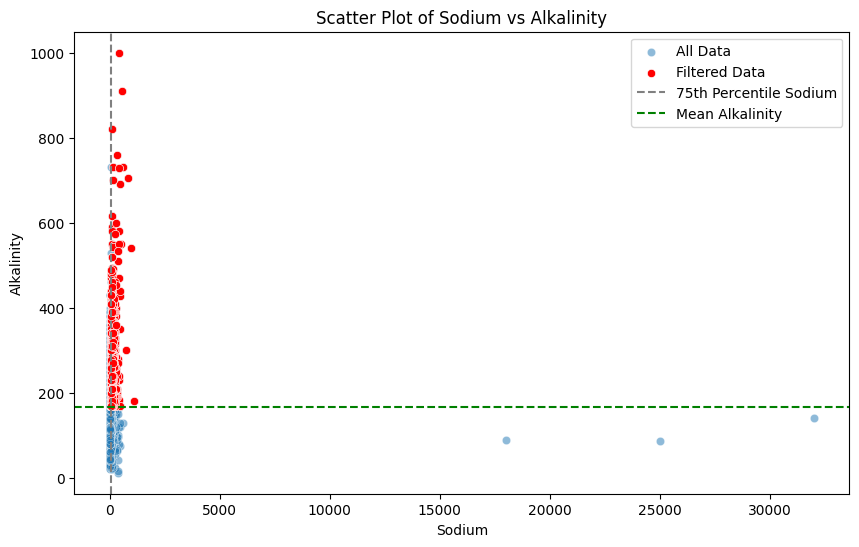

Hardness rata-rata dari sumber air dengan Sodium di atas persentil 75 dan Alkalinity di atas rata-rata adalah: 383.0833134765625


In [ ]:
sodium_p75 = train_df['Sodium'].quantile(0.75)

# Rata-rata Alkalinity
alkalinity_mean = train_df['Alkalinity__total'].mean()

# Filter data sesuai dengan kriteria
filtered_data = train_df[(train_df['Sodium'] > sodium_p75) & (train_df['Alkalinity__total'] > alkalinity_mean)]

# Menghitung rata-rata Hardness dari data yang difilter
hardness_mean_filtered = filtered_data['Hardness'].mean()

# Visualisasi distribusi data dan titik-titik yang memenuhi kriteria
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sodium', y='Alkalinity__total', data=train_df, alpha=0.5, label='All Data')
sns.scatterplot(x='Sodium', y='Alkalinity__total', data=filtered_data, color='red', label='Filtered Data')
plt.axvline(x=sodium_p75, color='gray', linestyle='--', label='75th Percentile Sodium')
plt.axhline(y=alkalinity_mean, color='green', linestyle='--', label='Mean Alkalinity')
plt.xlabel('Sodium')
plt.ylabel('Alkalinity')
plt.title('Scatter Plot of Sodium vs Alkalinity')
plt.legend()
plt.show()

print(f"Hardness rata-rata dari sumber air dengan Sodium di atas persentil 75 dan Alkalinity di atas rata-rata adalah: {hardness_mean_filtered}")

#### b. Apakah ada sumber air yang memiliki tingkat kebasaan (Alkalinity) yang dapat dianggap outlier? Jelaskan!


Sumber air dengan tingkat kebasaan (Alkalinity) yang dapat dianggap outlier:


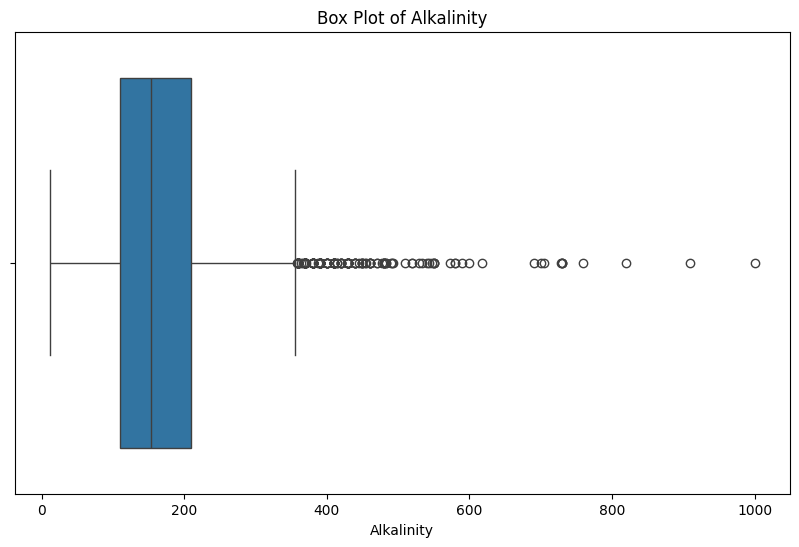

Ada 174 Jumlah sumber air dengan tingkat kebasaan (Alkalinity) yang dapat dianggap outlier


In [ ]:
# Menghitung IQR dari kolom Alkalinity
Q1 = train_df['Alkalinity__total'].quantile(0.25)
Q3 = train_df['Alkalinity__total'].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan bawah untuk menentukan outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data untuk menemukan nilai Alkalinity yang di luar kisaran IQR (outlier)
outliers = train_df[(train_df['Alkalinity__total'] < lower_bound) | (train_df['Alkalinity__total'] > upper_bound)]

# Jika ada data yang dianggap outlier, cetak informasinya
if not outliers.empty:
    print("Sumber air dengan tingkat kebasaan (Alkalinity) yang dapat dianggap outlier:")
    (outliers[['id', 'Alkalinity__total']])
else:
    print("Tidak ada sumber air dengan tingkat kebasaan (Alkalinity) yang dapat dianggap outlier.")

# Visualisasi menggunakan box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['Alkalinity__total'])
plt.title('Box Plot of Alkalinity')
plt.xlabel('Alkalinity')
plt.show()

jumlah_outliers = outliers.shape[0]

print(f"Ada {jumlah_outliers} Jumlah sumber air dengan tingkat kebasaan (Alkalinity) yang dapat dianggap outlier")

### **4. Apakah ada hubungan antara Specific Conductivity dan Hardness? Jelaskan!**



In [ ]:
correlation = train_df['Specific_Conductivity'].corr(train_df['Hardness'])
print(f"Korelasi antara Specific Conductivity dan Hardness dengan nilai korelasi Pearson: {correlation}")

Korelasi antara Specific Conductivity dan Hardness dengan nilai korelasi Pearson: 0.6352710459414745


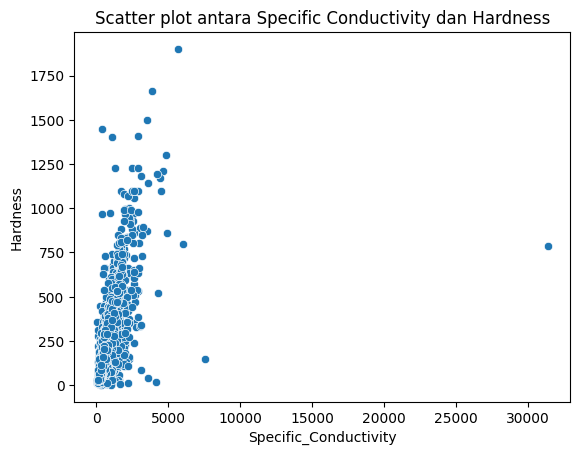

In [ ]:
sns.scatterplot(x='Specific_Conductivity', y='Hardness', data=train_df)
plt.title('Scatter plot antara Specific Conductivity dan Hardness')
plt.show()

**Jawab**

Dari hasil nilai korelasi pearson antara Specific Conductivity dan Hardness sebesar 0.635 dimana nilai tersebut adalah nilai korelasi yang sedang karena mendekati 1. Kemudian pada grafik, dapat dilihat bahwa ada hubungan linear POSITIF yang berarti meningkatnya Specific Conductivity cenderung meningkatkan Hardness juga. Dapat disimpulkan bahwa Specific Conductivity dan Hardness memiliki hubungan linear positif yang kurang kuat, karena pesebaran data pada grafik cenderung berkumpul disekitar nilai Specific Conductivity yang rendah

### **5. Dari zat-zat kimia yang diberikan, zat-zat apa saja yang paling mempengaruhi dan paling tidak mempengaruhi Hardness? Jelaskan!**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity__total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate_as_N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific_Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total_Dissolved_Solids  6400 non-null   float64
 11  Calcium_to_Magnesium    6400 non-null   float64
 12  Total_Mineral_Content   6400 non-null   float64
 13  Calcium_Proportion      6400 non-null   float64
 14  Magnesium_Proportion    6400 non-null   

In [ ]:
features = ['Alkalinity__total', 'Calcium', 'Chloride', 'Fluoride', 'Magnesium', 'Nitrate_as_N', 'Sodium', 'Specific_Conductivity', 'Sulfate', 'Total_Dissolved_Solids']
X = train_df[features]
y = train_df['Hardness']

model = LinearRegression()
model.fit(X, y)
coefficients = pd.DataFrame({'fitur': features, 'koefisien': model.coef_})
coefficients = coefficients.sort_values(by='koefisien', ascending=False)
print(coefficients)

                    fitur  koefisien
5            Nitrate_as_N   3.581160
0       Alkalinity__total   0.683182
8                 Sulfate   0.463860
2                Chloride   0.274863
9  Total_Dissolved_Solids   0.145903
4               Magnesium   0.024428
1                 Calcium   0.002556
7   Specific_Conductivity   0.001824
6                  Sodium  -0.016347
3                Fluoride -44.407586


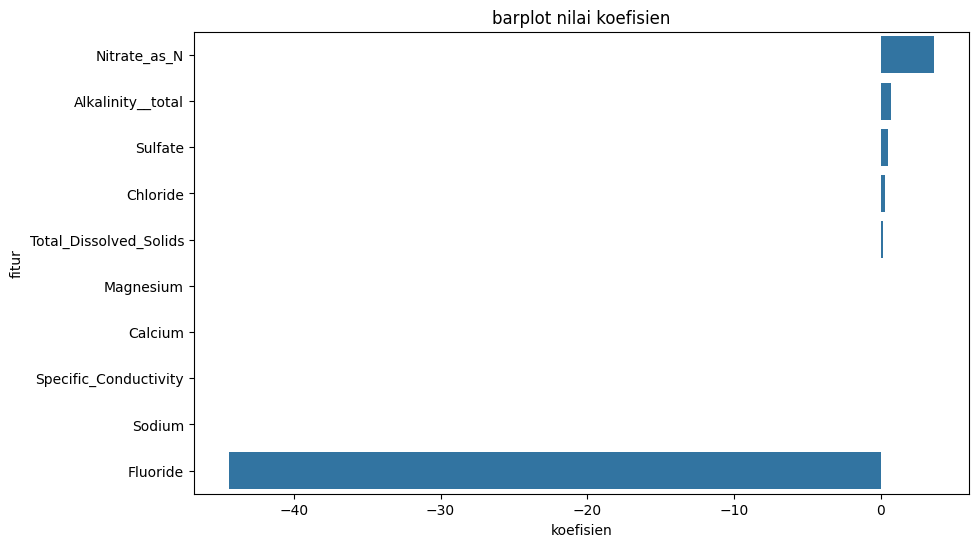

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='koefisien', y='fitur', data=coefficients)
plt.title('barplot nilai koefisien')
plt.show()

**Jawab**

Pada grafik hasil dari regresi linear terlihat bahwa Fluoride memiliki pengaruh memiliki pengaruh NEGATIF terbesar pada Hardness karena memiliki koefisien negatif yang besar dengan koefisien sebesar -44,407, sehingga semakin kebawah Fluoride cenderung meningkatkan Hardness. Kemudian ada Nitrate as N memiliki pengaruh POSITIF terbesar pada Hardness dengan koefisien sebesar 3.581, sehingga meningkatnya Nitrate as N cenderung meningkatkan Hardness. Sedangkan zat-zat lainnya memiliki nilai koefisien mendekati nol sehingga pengaruhnya sangatlah kecil.

Zat yang paling besar mempengaruhi dapat dilihat dari variabel dengan koefisien terbesar (baik positif atau negatif), sedangkan yang koefisiennya mendekati nol memiliki pengaruh paling kecil.

### **6. Apakah ada pasangan zat kimia yang berkorelasi tinggi? Apakah ada efek dari korelasi tersebut?**


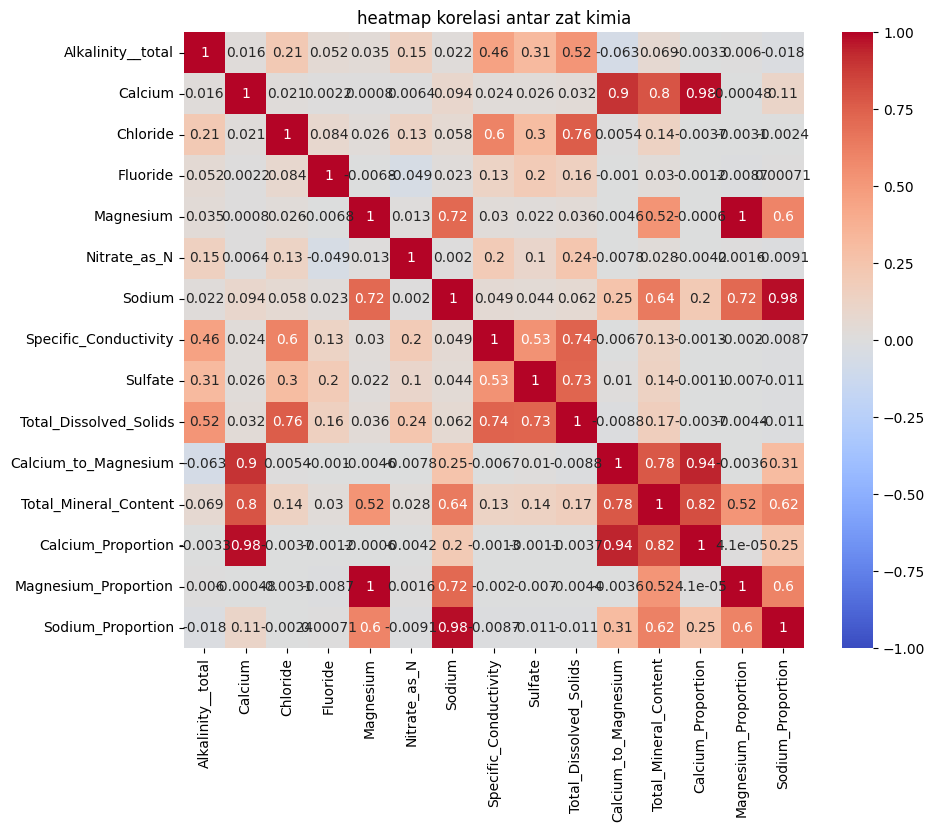

In [ ]:
corr_matrix = train_df.drop(columns=['Hardness', 'id']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('heatmap korelasi antar zat kimia')
plt.show()

In [ ]:
threshold = 0.7
high_corr_pairs = [(col1, col2, corr_matrix.loc[col1, col2]) for col1 in corr_matrix.columns for col2 in corr_matrix.columns if col1 != col2 and abs(corr_matrix.loc[col1, col2]) > threshold]
print('Pasangan zat kimia dengan korelasi tinggi (> 0.7):')
for pair in high_corr_pairs:
    print(f"{pair[0]} dan {pair[1]}: {pair[2]}")

Pasangan zat kimia dengan korelasi tinggi (> 0.7):
Calcium dan Calcium_to_Magnesium: 0.900102532144302
Calcium dan Total_Mineral_Content: 0.7955001832580447
Calcium dan Calcium_Proportion: 0.9769552142245991
Chloride dan Total_Dissolved_Solids: 0.7638762385710612
Magnesium dan Sodium: 0.7172360185916846
Magnesium dan Magnesium_Proportion: 0.9986699513347109
Sodium dan Magnesium: 0.7172360185916846
Sodium dan Magnesium_Proportion: 0.7160413128839639
Sodium dan Sodium_Proportion: 0.9818993280038304
Specific_Conductivity dan Total_Dissolved_Solids: 0.7362350431455789
Sulfate dan Total_Dissolved_Solids: 0.7276027429137002
Total_Dissolved_Solids dan Chloride: 0.7638762385710612
Total_Dissolved_Solids dan Specific_Conductivity: 0.7362350431455789
Total_Dissolved_Solids dan Sulfate: 0.7276027429137002
Calcium_to_Magnesium dan Calcium: 0.900102532144302
Calcium_to_Magnesium dan Total_Mineral_Content: 0.7794610146108656
Calcium_to_Magnesium dan Calcium_Proportion: 0.9436484552948315
Total_Miner

**Jawab**

Karena tidak ada pasangan yang memiliki korelasi lebih dari 0.8, saya menurunkan tresholdnya menjadi 0.7. Kemudian ditemukan beberapa pasangan yang memiliki korelasi POSITIF lebih dari 0.7:

Chloride dan Total Dissolved Solids (meningkatnya Chloride cenderung meningkatkan Total Dissoled Solids juga)
Magnesium dan Sodium (meningkatnya Magnesium cenderung meningkatkan Sodium juga)
Specific Conductivity dan Total Dissolved Solids (meningkatnya Specific Conductivity cenderung meningkatkan Total Dissoled Solids juga - secara chemistry juga masuk akal)
Sulfate dan Total Dissolved Solids (meningkatnya Sulfate cenderung meningkatkan Total Dissoled Solids juga)

### **7. Jelaskan fitur baru apa saja yang anda peroleh untuk membantu kemampuan model dalam memprediksi ketika anda melalui proses feature engineering.**

Dalam proses feature engineering yang dilakukan, terdapat beberapa fitur baru yang telah dibuat untuk membantu kemampuan model dalam memprediksi nilai Hardness (kesadahan air). Berikut adalah penjelasan singkat tentang fitur-fitur baru yang telah Anda tambahkan:

- Calcium_to_Magnesium: Fitur ini adalah rasio antara konsentrasi Calcium (Ca) dan Magnesium (Mg) dalam air. Kalsium dan magnesium adalah komponen penting dalam kesadahan air, dan rasio ini dapat memberikan informasi tambahan tentang proporsi antara kedua mineral ini dalam mempengaruhi kesadahan air.

- Total_Mineral_Content: Fitur ini merupakan jumlah total mineral dalam air, yang dihitung dari konsentrasi Calcium, Magnesium, Sodium, Chloride, Sulfate, Nitrate, dan Fluoride. Total mineral dalam air dapat secara signifikan mempengaruhi kesadahan air dan kualitasnya.

- Calcium_Proportion: Fitur ini menunjukkan proporsi Calcium terhadap Total Dissolved Solids (TDS). TDS adalah jumlah total zat terlarut dalam air, termasuk mineral-mineral tersebut. Proporsi Calcium terhadap TDS dapat memberikan gambaran tentang kontribusi Calcium terhadap kesadahan air relatif terhadap zat terlarut lainnya.

- Magnesium_Proportion: Serupa dengan Calcium_Proportion, fitur ini adalah proporsi Magnesium terhadap TDS. Magnesium juga berperan penting dalam kesadahan air, dan proporsi ini dapat memberikan informasi tambahan tentang kontribusi Magnesium terhadap kesadahan air.

- Sodium_Proportion: Fitur ini adalah proporsi Sodium terhadap TDS. Sodium juga dapat mempengaruhi kesadahan air, meskipun dalam proporsi yang lebih rendah dibandingkan dengan Calcium dan Magnesium. Proporsi Sodium terhadap TDS dapat memberikan konteks tambahan tentang konsentrasi Sodium dalam air.

### **8. Jelaskan model yang Anda gunakan dalam memprediksi label Hardness! Mengapa Anda menggunakan model tersebut?**
Dalam kasus ini, penulis menggunakan beberapa model regresi yang berbeda untuk memprediksi label Hardness (kesadahan air), yaitu:

- Linear Regression: Model ini digunakan karena sifatnya yang sederhana dan dapat memberikan interpretasi yang cukup jelas terhadap hubungan antara fitur-fitur independen dengan variabel target. Namun, dari hasilnya (R2 Score yang negatif), terlihat bahwa model ini tidak cocok untuk dataset ini.

- Random Forest Regressor: Model ini dipilih karena kemampuannya menangani ketergantungan non-linear dan memiliki kekuatan dalam menangani data dengan banyak fitur. Hasilnya menunjukkan R2 Score yang cukup baik.

- Gradient Boosting Regressor: Model ini efektif dalam memperbaiki kesalahan prediksi model sebelumnya, dengan cara melakukan boosting terhadap model yang sudah ada. Meskipun performanya cukup baik, namun sedikit lebih rendah dibandingkan beberapa model lainnya.

- Support Vector Regressor (SVR): SVR dipilih karena kemampuannya menangani data yang kompleks dan memiliki beberapa parameter yang dapat disesuaikan untuk meningkatkan performa. Namun, hasilnya menunjukkan R2 Score yang lebih rendah dibandingkan model lainnya.

- XGBoost, LightGBM, CatBoost: Ketiga model ini (XGBoost, LightGBM, dan CatBoost) merupakan implementasi dari algoritma boosting yang dapat mengatasi data yang besar, non-linear, dan memiliki kemampuan untuk meningkatkan performa secara signifikan. Dari hasil yang Anda peroleh, LightGBM menjadi model terbaik dengan R2 Score yang tertinggi.

- K-Nearest Neighbors (KNN): Model ini dipilih karena sifatnya yang non-parametrik dan dapat menangani pola-pola yang kompleks dalam data. Namun, performanya sedikit lebih rendah dibandingkan dengan model boosting seperti LightGBM.


Penulis memilih LightGBM sebagai model terbaik karena hasil evaluasi menunjukkan bahwa LightGBM memberikan R2 Score yang paling tinggi dibandingkan dengan model lainnya pada dataset validasi. LightGBM juga memiliki keunggulan dalam kecepatan training dan prediksi yang lebih cepat dibandingkan dengan XGBoost dan CatBoost.

### **9. Menurut Anda, apakah metrik penilaian R2 tepat? Jika tidak, metrik penilaian apa yang menurut anda lebih tepat digunakan? Elaborasikan jawaban Anda!**

**Jawab**

Menurut kami , R² score tidak selalu tepat untuk mengevaluasi kemampuan prediksi model regresi karena tidak memberikan informasi tentang kesalahan prediksi dan bisa menyesatkan jika ada overfitting. Oleh sebab itu, metrik lain seperti MAE, MSE, RMSE, atau MAPE lebih tepat digunakan untuk menilai kemampuan prediksi model secara lebih komprehensif.

### **10. Jika Anda boleh mengambil data dari sumber eksternal, data tentang apa yang Anda akan ambil? Jelaskan mengapa data tersebut dapat membantu Anda memprediksi Hardness!**

Jika kami boleh mengambil data dari external kami akan mengambil beberapa data dari sumber eksternal yang mungkin relevan, yaitu ;

Komposisi Kimia, Data tentang kandungan unsur-unsur seperti karbon, silikon, dan lainnya akan membantu kita memahami bagaimana komposisi ini memengaruhi sifat mekanis material.
Struktur Mikro, Informasi tentang ukuran butir, distribusi fase, dan bentuk kristal juga penting. Struktur mikro memainkan peran besar dalam menentukan hardness.
Proses Manufaktur, Data tentang metode produksi dan perlakuan panas yang diterapkan pada material juga relevan. Proses manufaktur mempengaruhi sifat material, termasuk hardness.
Suhu dan Waktu, Informasi tentang suhu dan waktu pemanasan atau pendinginan material juga diperlukan. Perubahan struktur material terjadi seiring dengan perubahan suhu dan waktu.

### **DAFTAR PUSTAKA**
- Sulaiman, S. K., Enakshee, J., Traxer, O., & Somani, B. K. (2020). Which type of water is recommended for patients with stone disease (hard or soft water, tap or bottled water): evidence from a systematic review over the last 3 decades. Current urology reports, 21, 1-8.
- Lestari, D. S., & Sari, Y. C. (2023, June). Corrosivity of water for concrete and metal water resources infrastructure with modification of the DIN Method and Langelier Saturation Index of Metcalf and Eddy. In IOP Conference Series: Earth and Environmental Science (Vol. 1195, No. 1, p. 012054). IOP Publishing.
- Rice, L., Wong, E., & Kolter, Z. (2020, November). Overfitting in adversarially robust deep learning. In International conference on machine learning (pp. 8093-8104). PMLR.